# Understanding Data

In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, RobustScaler, StandardScaler, MinMaxScaler
from sklearn.feature_selection import mutual_info_classif


import warnings
warnings.filterwarnings('ignore')

In [100]:
train = pd.read_csv(r"train.csv")
train.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,176346.62670,Not Verified,n,Debt Consolidation,16.284758,1,0,13,0,24246,74.932551,7,w,2929.646315,0.102055,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,39833.92100,Source Verified,n,Debt consolidation,15.412409,0,0,12,0,812,78.297186,13,f,772.769385,0.036181,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,91506.69105,Source Verified,n,Debt Consolidation,28.137619,0,0,14,0,1843,2.073040,20,w,863.324396,18.778660,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,108286.57590,Source Verified,n,Debt consolidation,18.043730,1,0,7,0,13819,67.467951,12,w,288.173196,0.044131,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,44234.82545,Source Verified,n,Credit card refinancing,17.209886,1,3,13,1,1544,85.250761,22,w,129.239553,19.306646,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


In [101]:
test = pd.read_csv(r"test.csv")
test.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,56492997,17120,10365,16025.082690,59,BAT2575549,12.163926,A,D1,RENT,76468.82190,Source Verified,n,Home improvement,16.749219,1,0,12,1,3576,67.278287,5,f,4469.449851,0.088031,8.425776,0.731797,0,INDIVIDUAL,135,0,24,475442,4364,NaN
1,22540813,7133,11650,12615.795600,59,BAT2833642,6.564296,B,E3,MORTGAGE,38079.01344,Source Verified,n,Credit card refinancing,18.157975,0,0,11,0,1932,71.313157,21,w,993.907530,0.041237,6.157008,0.992918,0,INDIVIDUAL,56,0,1,72412,2573,NaN
2,9862181,25291,25825,11621.280830,59,BAT1761981,14.729900,A,C3,MORTGAGE,51275.93268,Source Verified,n,Debt consolidation,15.190011,0,0,22,0,598,50.883065,23,f,729.113379,0.021745,5.705077,0.281580,0,INDIVIDUAL,3,0,26,284825,19676,NaN
3,10097822,30781,9664,15375.823510,59,BAT5341619,10.523767,A,A2,RENT,68867.98965,Verified,n,Debt Consolidation,21.292550,0,0,11,0,5222,82.449083,28,w,715.867091,0.092398,2.469688,0.959162,0,INDIVIDUAL,21,0,32,40842,7226,NaN
4,47771809,8878,9419,7176.647582,58,BAT4694572,9.997013,C,B3,OWN,91556.85423,Verified,n,Debt consolidation,4.812117,0,0,11,0,553,49.075855,9,w,248.572854,0.010354,2.127835,0.402315,0,INDIVIDUAL,104,0,33,90825,26145,NaN


In [102]:
print(train.shape)
print(test.shape)

(67463, 35)
(28913, 35)


In [103]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67463 non-null  int64  
 1   Loan Amount                   67463 non-null  int64  
 2   Funded Amount                 67463 non-null  int64  
 3   Funded Amount Investor        67463 non-null  float64
 4   Term                          67463 non-null  int64  
 5   Batch Enrolled                67463 non-null  object 
 6   Interest Rate                 67463 non-null  float64
 7   Grade                         67463 non-null  object 
 8   Sub Grade                     67463 non-null  object 
 9   Employment Duration           67463 non-null  object 
 10  Home Ownership                67463 non-null  float64
 11  Verification Status           67463 non-null  object 
 12  Payment Plan                  67463 non-null  object 
 13  L

In [104]:
print(train.isnull().sum())
print("*"*60)
print(test.isnull().sum())

ID                              0
Loan Amount                     0
Funded Amount                   0
Funded Amount Investor          0
Term                            0
Batch Enrolled                  0
Interest Rate                   0
Grade                           0
Sub Grade                       0
Employment Duration             0
Home Ownership                  0
Verification Status             0
Payment Plan                    0
Loan Title                      0
Debit to Income                 0
Delinquency - two years         0
Inquires - six months           0
Open Account                    0
Public Record                   0
Revolving Balance               0
Revolving Utilities             0
Total Accounts                  0
Initial List Status             0
Total Received Interest         0
Total Received Late Fee         0
Recoveries                      0
Collection Recovery Fee         0
Collection 12 months Medical    0
Application Type                0
Last week Pay 

In [105]:
test['Loan Status'] = 0
test

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,56492997,17120,10365,16025.082690,59,BAT2575549,12.163926,A,D1,RENT,76468.82190,Source Verified,n,Home improvement,16.749219,1,0,12,1,3576,67.278287,5,f,4469.449851,0.088031,8.425776,0.731797,0,INDIVIDUAL,135,0,24,475442,4364,0
1,22540813,7133,11650,12615.795600,59,BAT2833642,6.564296,B,E3,MORTGAGE,38079.01344,Source Verified,n,Credit card refinancing,18.157975,0,0,11,0,1932,71.313157,21,w,993.907530,0.041237,6.157008,0.992918,0,INDIVIDUAL,56,0,1,72412,2573,0
2,9862181,25291,25825,11621.280830,59,BAT1761981,14.729900,A,C3,MORTGAGE,51275.93268,Source Verified,n,Debt consolidation,15.190011,0,0,22,0,598,50.883065,23,f,729.113379,0.021745,5.705077,0.281580,0,INDIVIDUAL,3,0,26,284825,19676,0
3,10097822,30781,9664,15375.823510,59,BAT5341619,10.523767,A,A2,RENT,68867.98965,Verified,n,Debt Consolidation,21.292550,0,0,11,0,5222,82.449083,28,w,715.867091,0.092398,2.469688,0.959162,0,INDIVIDUAL,21,0,32,40842,7226,0
4,47771809,8878,9419,7176.647582,58,BAT4694572,9.997013,C,B3,OWN,91556.85423,Verified,n,Debt consolidation,4.812117,0,0,11,0,553,49.075855,9,w,248.572854,0.010354,2.127835,0.402315,0,INDIVIDUAL,104,0,33,90825,26145,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28908,11537800,35000,35000,35000.000000,60,BAT5629144,16.240000,C,C5,MORTGAGE,360000.00000,Verified,n,Credit card refinancing,7.310000,0,0,8,1,83274,72.200000,16,f,10116.330000,0.000000,0.000000,0.000000,0,INDIVIDUAL,109,0,0,883984,114000,0
28909,11538258,25000,25000,25000.000000,60,BAT5629144,14.980000,C,C3,MORTGAGE,105000.00000,Source Verified,n,Debt consolidation,10.220000,0,1,10,0,26356,50.900000,26,f,6493.950000,0.000000,0.000000,0.000000,0,INDIVIDUAL,104,0,0,513925,51800,0
28910,13147685,30000,30000,29950.000000,60,BAT2136391,18.240000,D,D5,MORTGAGE,74100.00000,Verified,n,Debt consolidation,27.300000,0,0,19,0,31303,47.700000,45,f,7785.190000,0.000000,0.000000,0.000000,1,INDIVIDUAL,83,0,0,296294,65600,0
28911,13917689,25000,25000,24950.000000,60,BAT2136391,15.610000,D,D1,MORTGAGE,130000.00000,Verified,n,Debt consolidation,27.290000,2,0,12,0,25470,83.800000,34,f,5513.520000,0.000000,0.000000,0.000000,0,INDIVIDUAL,83,0,0,428723,30400,0


No more null values

In [106]:
train['Loan Status'].value_counts()

0    61222
1     6241
Name: Loan Status, dtype: int64

# We have an imbalanced dataset. Before using the dataset for modelling, we will preprocess our train and test data.

In [107]:
#train

# Data Processing

In [108]:
cols = train.columns
cat_cols =[]
num_cols =[]
for col in cols:
    if train[col].dtype=='object':
        cat_cols.append(col)
    else:
        num_cols.append(col)
print(cat_cols)
print(num_cols)

['Batch Enrolled', 'Grade', 'Sub Grade', 'Employment Duration', 'Verification Status', 'Payment Plan', 'Loan Title', 'Initial List Status', 'Application Type']
['ID', 'Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term', 'Interest Rate', 'Home Ownership', 'Debit to Income', 'Delinquency - two years', 'Inquires - six months', 'Open Account', 'Public Record', 'Revolving Balance', 'Revolving Utilities', 'Total Accounts', 'Total Received Interest', 'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee', 'Collection 12 months Medical', 'Last week Pay', 'Accounts Delinquent', 'Total Collection Amount', 'Total Current Balance', 'Total Revolving Credit Limit', 'Loan Status']


From list of categorical columns, we have to figure out : nominal, ordinal col types


['Batch Enrolled', 'Grade', 'Sub Grade', 'Employment Duration', 'Verification Status', 'Payment Plan', 'Loan Title', 'Initial List Status', 'Application Type']

In [109]:
nominal_cat_cols = []
ordinal_cat_cols = []

In [110]:
nominal_cat_cols.append('Batch Enrolled')
train["Batch Enrolled"].value_counts()

BAT3873588    3626
BAT1586599    3142
BAT1104812    2996
BAT2252229    2557
BAT2803411    2425
BAT1780517    2403
BAT1184694    2298
BAT2078974    2290
BAT2575549    2257
BAT4694572    2248
BAT4271519    2054
BAT2558388    1963
BAT3193689    1864
BAT1930365    1844
BAT2136391    1790
BAT2333412    1775
BAT3726927    1774
BAT4136152    1766
BAT5341619    1717
BAT5525466    1709
BAT5489674    1677
BAT5629144    1639
BAT1766061    1461
BAT2833642    1421
BAT5924421    1404
BAT2522922    1399
BAT2428731    1398
BAT4808022    1303
BAT4351734    1140
BAT5547201    1127
BAT5714674    1105
BAT3461431    1068
BAT224923      895
BAT1761981     894
BAT4722912     887
BAT2003848     842
BAT1467036     802
BAT5849876     768
BAT3865626     728
BAT5811547     711
BAT1135695     296
Name: Batch Enrolled, dtype: int64

In [111]:
ordinal_cat_cols.append('Grade')
train["Grade"].value_counts()

C    19085
B    18742
A    12055
D     8259
E     6446
F     2246
G      630
Name: Grade, dtype: int64

In [112]:
nominal_cat_cols.append('Sub Grade')
train["Sub Grade"].value_counts()

B4    4462
C1    4188
B3    3999
A5    3540
B2    3520
B5    3408
D1    3304
C4    3250
C2    3219
C3    3121
B1    2924
C5    2472
A4    2264
D4    2050
D2    1963
D5    1952
A2    1837
D3    1824
E2    1746
A3    1685
A1    1364
E3    1321
E1    1298
E4    1117
F2     947
F1     824
E5     769
F5     582
F3     578
G2     447
F4     441
G1     366
G5     284
G3     246
G4     151
Name: Sub Grade, dtype: int64

In [113]:
ordinal_cat_cols.append('Employment Duration')
train["Employment Duration"].value_counts()

MORTGAGE    36351
RENT        24150
OWN          6962
Name: Employment Duration, dtype: int64

In [114]:
ordinal_cat_cols.append('Verification Status')
train["Verification Status"].value_counts()

Source Verified    33036
Verified           18078
Not Verified       16349
Name: Verification Status, dtype: int64

In [115]:
nominal_cat_cols.append('Payment Plan')
train["Payment Plan"].value_counts()

n    67463
Name: Payment Plan, dtype: int64

In [116]:
nominal_cat_cols.append('Loan Title')
print(train["Loan Title"].value_counts())
print("---------------------------------------")
print(train["Loan Title"].nunique())

Credit card refinancing    30728
Debt consolidation         24841
Debt Consolidation          3544
Other                       2455
Home improvement            2211
                           ...  
Debt Consolidation 2013        6
Getting Ahead                  5
Personal loan                  5
Credit                         4
bills                          4
Name: Loan Title, Length: 109, dtype: int64
---------------------------------------
109


In [117]:
ordinal_cat_cols.append('Initial List Status')
train["Initial List Status"].value_counts()

w    36299
f    31164
Name: Initial List Status, dtype: int64

In [118]:
ordinal_cat_cols.append('Application Type')
train["Application Type"].value_counts()

INDIVIDUAL    67340
JOINT           123
Name: Application Type, dtype: int64

In [119]:
print(nominal_cat_cols)
print(ordinal_cat_cols)

['Batch Enrolled', 'Sub Grade', 'Payment Plan', 'Loan Title']
['Grade', 'Employment Duration', 'Verification Status', 'Initial List Status', 'Application Type']


In [120]:
print(nominal_cat_cols)
print(ordinal_cat_cols)

['Batch Enrolled', 'Sub Grade', 'Payment Plan', 'Loan Title']
['Grade', 'Employment Duration', 'Verification Status', 'Initial List Status', 'Application Type']


Next step, I will be converting ordinal dtype features to their mean label values and nominal dtype features would be label encoded

In [121]:
print(ordinal_cat_cols)

['Grade', 'Employment Duration', 'Verification Status', 'Initial List Status', 'Application Type']


In [122]:
g = (train[["Grade", "Loan Status"]]
        .groupby(["Grade"], as_index=False)
        .mean()
        .sort_values(by="Loan Status", ascending=True)
)['Grade']
idx_g = g.index
val_g = g.values
g_labels = {k:i for i,k in enumerate(val_g,0)}
print(g_labels)
train["Grade"] = train["Grade"].map(g_labels)

e = (train[["Employment Duration", "Loan Status"]]
        .groupby(["Employment Duration"], as_index=False)
        .mean()
        .sort_values(by="Loan Status", ascending=True)
)['Employment Duration']
idx_e = e.index
val_e = e.values
e_labels = {k:i for i,k in enumerate(val_e,0)}
train["Employment Duration"] = train["Employment Duration"].map(e_labels)


v = (train[["Verification Status", "Loan Status"]]
        .groupby(["Verification Status"], as_index=False)
        .mean()
        .sort_values(by="Loan Status", ascending=True)
)['Verification Status']
idx_v = v.index
val_v = v.values
v_labels = {k:i for i,k in enumerate(val_v,0)}
train["Verification Status"] = train["Verification Status"].map(v_labels)


l = (train[["Initial List Status", "Loan Status"]]
        .groupby(["Initial List Status"], as_index=False)
        .mean()
        .sort_values(by="Loan Status", ascending=True)
)['Initial List Status']
idx_l = l.index
val_l = l.values
l_labels = {k:i for i,k in enumerate(val_l,0)}
train["Initial List Status"] = train["Initial List Status"].map(l_labels)


ap = (train[["Application Type", "Loan Status"]]
        .groupby(["Application Type"], as_index=False)
        .mean()
        .sort_values(by="Loan Status", ascending=True)
)['Application Type']
idx_ap = ap.index
val_ap = ap.values
ap_labels = {k:i for i,k in enumerate(val_ap,0)}
train["Application Type"] = train["Application Type"].map(ap_labels)



#------------------------------TEST-------------------------------------------------------------------#




g = (test[["Grade", "Loan Status"]]
        .groupby(["Grade"], as_index=False)
        .mean()
        .sort_values(by="Loan Status", ascending=True)
)['Grade']
idx_g = g.index
val_g = g.values
g_labels = {k:i for i,k in enumerate(val_g,0)}
test["Grade"] = test["Grade"].map(g_labels)

e = (test[["Employment Duration", "Loan Status"]]
        .groupby(["Employment Duration"], as_index=False)
        .mean()
        .sort_values(by="Loan Status", ascending=True)
)['Employment Duration']
idx_e = e.index
val_e = e.values
e_labels = {k:i for i,k in enumerate(val_e,0)}
test["Employment Duration"] = test["Employment Duration"].map(e_labels)


v = (test[["Verification Status", "Loan Status"]]
        .groupby(["Verification Status"], as_index=False)
        .mean()
        .sort_values(by="Loan Status", ascending=True)
)['Verification Status']
idx_v = v.index
val_v = v.values
v_labels = {k:i for i,k in enumerate(val_v,0)}
test["Verification Status"] = test["Verification Status"].map(v_labels)


l = (test[["Initial List Status", "Loan Status"]]
        .groupby(["Initial List Status"], as_index=False)
        .mean()
        .sort_values(by="Loan Status", ascending=True)
)['Initial List Status']
idx_l = l.index
val_l = l.values
l_labels = {k:i for i,k in enumerate(val_l,0)}
test["Initial List Status"] = test["Initial List Status"].map(l_labels)


ap = (test[["Application Type", "Loan Status"]]
        .groupby(["Application Type"], as_index=False)
        .mean()
        .sort_values(by="Loan Status", ascending=True)
)['Application Type']
idx_ap = ap.index
val_ap = ap.values
ap_labels = {k:i for i,k in enumerate(val_ap,0)}
test["Application Type"] = test["Application Type"].map(ap_labels)

{'B': 0, 'A': 1, 'C': 2, 'E': 3, 'D': 4, 'F': 5, 'G': 6}


Label Encoding nominal feature set

In [123]:
print(nominal_cat_cols)

['Batch Enrolled', 'Sub Grade', 'Payment Plan', 'Loan Title']


In [124]:
#Enocding nominal dtype features
le = LabelEncoder()

train['Batch Enrolled'] = le.fit_transform(train["Batch Enrolled"])
test["Batch Enrolled"] = le.fit_transform(test["Batch Enrolled"])

train['Sub Grade'] = le.fit_transform(train["Sub Grade"])
test["Sub Grade"] = le.fit_transform(test["Sub Grade"])

train['Payment Plan'] = le.fit_transform(train["Payment Plan"])
test["Payment Plan"] = le.fit_transform(test["Payment Plan"])

train['Loan Title'] = le.fit_transform(train["Loan Title"])
test["Loan Title"] = le.fit_transform(test["Loan Title"])

In [125]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67463 non-null  int64  
 1   Loan Amount                   67463 non-null  int64  
 2   Funded Amount                 67463 non-null  int64  
 3   Funded Amount Investor        67463 non-null  float64
 4   Term                          67463 non-null  int64  
 5   Batch Enrolled                67463 non-null  int64  
 6   Interest Rate                 67463 non-null  float64
 7   Grade                         67463 non-null  int64  
 8   Sub Grade                     67463 non-null  int64  
 9   Employment Duration           67463 non-null  int64  
 10  Home Ownership                67463 non-null  float64
 11  Verification Status           67463 non-null  int64  
 12  Payment Plan                  67463 non-null  int64  
 13  L

In [126]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28913 entries, 0 to 28912
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            28913 non-null  int64  
 1   Loan Amount                   28913 non-null  int64  
 2   Funded Amount                 28913 non-null  int64  
 3   Funded Amount Investor        28913 non-null  float64
 4   Term                          28913 non-null  int64  
 5   Batch Enrolled                28913 non-null  int64  
 6   Interest Rate                 28913 non-null  float64
 7   Grade                         28913 non-null  int64  
 8   Sub Grade                     28913 non-null  int64  
 9   Employment Duration           28913 non-null  int64  
 10  Home Ownership                28913 non-null  float64
 11  Verification Status           28913 non-null  int64  
 12  Payment Plan                  28913 non-null  int64  
 13  L

In [127]:
#test

# Scaling our data

In [128]:
rscale = RobustScaler()


X_train_bs = train.drop(columns=['Loan Status'])
y_train = train['Loan Status']
X_test_bs = test.drop(columns=['Loan Status'])
#y_test = test['Loan Status']

print(X_train_bs.shape)
print(y_train.shape)
print(X_test_bs.shape)
#print(y_test.shape)

X_train = pd.DataFrame( rscale.fit_transform(X_train_bs), columns = X_train_bs.columns )
X_test = pd.DataFrame( rscale.fit_transform(X_test_bs), columns = X_test_bs.columns )

(67463, 34)
(67463,)
(28913, 34)


In [129]:
X_train

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit
0,1.305072,-0.502150,1.532272,-0.058215,0.0,-0.157895,-0.049565,-0.666667,0.181818,0.0,2.492479,0.0,0.0,0.000000,-0.479379,1.0,0.0,0.000000,0.0,2.455588,0.683204,-1.1,0.0,0.766425,1.155358,-0.221301,0.022855,0.0,0.0,-0.271429,0.0,-0.227273,1.083912,-0.421575
1,-0.455541,-1.030594,-0.087973,-0.075438,0.0,-0.789474,0.175612,0.000000,0.545455,1.0,-0.687154,0.5,0.0,0.636364,-0.545009,0.0,0.0,-0.166667,0.0,-0.616716,0.793454,-0.5,1.0,-0.267526,-0.142138,-0.252963,0.327576,0.0,0.0,0.585714,0.0,0.772727,0.360913,0.173065
2,-0.441184,1.009013,-0.297849,1.104519,0.0,-0.421053,0.238582,1.000000,0.636364,0.0,0.516400,0.5,0.0,0.000000,0.412351,0.0,0.0,0.166667,0.0,-0.481547,-1.704201,0.2,0.0,-0.224116,369.021540,0.254126,0.403722,0.0,0.0,-0.028571,0.0,-0.090909,-0.160498,0.392731
3,-0.311640,-0.405408,-0.486010,0.637354,0.0,-0.210526,1.093358,0.000000,0.090909,0.0,0.907235,0.5,0.0,0.636364,-0.347046,1.0,0.0,-1.000000,0.0,1.088561,0.438610,-0.6,0.0,-0.499829,0.014454,-0.846648,-0.050764,0.0,0.0,-0.414286,0.0,0.181818,-0.613385,1.812388
4,-0.098519,0.067554,0.014689,0.093562,0.0,0.684211,0.741486,0.000000,0.636364,0.0,-0.584649,0.5,0.0,-0.363636,-0.409779,1.0,3.0,0.000000,1.0,-0.520747,1.021303,0.4,0.0,-0.576018,379.421091,337.736628,-0.691879,0.0,0.0,-0.714286,0.0,17.909091,0.043035,0.243675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67458,-0.048436,-0.204399,-0.494472,0.047845,0.0,0.105263,-0.402100,0.000000,-0.727273,0.0,0.340651,-0.5,0.0,-0.363636,0.409906,1.0,0.0,0.000000,0.0,-0.184071,1.431832,0.1,0.0,0.310684,-0.392353,146.779196,0.143174,0.0,0.0,0.014286,0.0,0.545455,0.356221,0.732275
67459,0.477718,-0.640814,-0.159342,0.356546,0.0,-0.631579,-0.287067,0.000000,-0.363636,1.0,-0.089550,0.5,0.0,-0.363636,-0.373336,0.0,0.0,-0.166667,0.0,0.553392,-1.257988,-0.4,0.0,0.848473,-0.321111,-0.347558,1.048664,0.0,0.0,-0.771429,0.0,0.045455,-0.537523,-0.334250
67460,-0.040939,-0.014553,1.586956,-0.058203,0.0,-0.736842,1.689664,-0.333333,1.454545,0.0,-0.804078,-0.5,0.0,2.000000,-0.929950,0.0,0.0,-1.000000,1.0,-0.435398,-1.722975,-0.9,0.0,0.652502,-0.299113,0.608949,1.391458,0.0,0.0,0.985714,0.0,-0.863636,0.328592,1.066942
67461,-0.349021,0.040847,-0.643995,1.073232,0.0,-0.263158,0.365861,0.666667,1.000000,2.0,0.642925,0.0,0.0,0.636364,-1.131662,0.0,0.0,0.166667,0.0,-0.569518,0.471833,-0.3,1.0,1.116219,0.612777,-0.571946,-0.963363,0.0,0.0,0.071429,0.0,1.136364,1.365031,0.931266


In [130]:
X_test

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit
0,0.757752,0.128000,-0.229054,0.324677,0.0,-0.055556,0.091084,-1.0,0.4,1.0,0.172564,0.0,0.0,1.000000,-0.361712,1.0,0.0,0.0,1.0,-0.331706,0.393711,-1.272727,-1.0,1.667861,0.984379,1.357834,0.156121,0.0,0.0,1.136364,0.0,-0.146341,2.053319,-0.590340
1,-0.085027,-0.713011,-0.125232,-0.033030,0.0,0.055556,-0.982062,-0.5,1.1,0.0,-0.702040,0.0,0.0,-1.000000,-0.255126,0.0,0.0,-0.2,0.0,-0.502493,0.521705,0.181818,0.0,-0.114044,0.218608,0.865713,0.424009,0.0,0.0,-0.060606,0.0,-0.707317,-0.206781,-0.663338
2,-0.399743,0.816084,1.020037,-0.137376,0.0,-0.777778,0.582843,-1.0,0.1,0.0,-0.401386,0.0,0.0,0.000000,-0.479680,0.0,0.0,2.0,0.0,-0.641076,-0.126379,0.363636,-1.0,-0.249804,-0.100368,0.767684,-0.305764,0.0,0.0,-0.863636,0.0,-0.097561,0.984382,0.033748
3,-0.393894,1.278400,-0.285691,0.256556,0.0,0.722222,-0.223245,-1.0,-1.0,1.0,-0.000600,0.5,0.0,-0.636364,-0.017965,0.0,0.0,-0.2,0.0,-0.160711,0.874959,0.818182,0.0,-0.256595,1.055846,0.065893,0.389379,0.0,0.0,-0.590909,0.0,0.048780,-0.383818,-0.473691
4,0.541270,-0.566063,-0.305486,-0.603712,-1.0,0.555556,-0.324196,0.0,-0.4,0.5,0.516302,0.5,0.0,0.000000,-1.264867,0.0,0.0,-0.2,0.0,-0.645751,-0.183707,-0.909091,0.0,-0.496176,-0.286779,-0.008259,-0.181900,0.0,0.0,0.666667,0.0,0.073171,-0.103525,0.297412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28908,-0.358150,1.633684,1.761332,2.315550,1.0,0.944444,0.872247,0.0,0.3,0.0,6.632024,0.5,0.0,-1.000000,-1.075878,0.0,0.0,-0.8,1.0,7.947746,0.549838,-0.272727,-1.0,4.563008,-0.456220,-0.469809,-0.594642,0.0,0.0,0.742424,0.0,-0.731707,4.344328,3.878215
28909,-0.358139,0.791579,0.953381,1.266337,1.0,0.944444,0.630773,0.0,0.1,0.0,0.822566,0.0,0.0,0.000000,-0.855709,0.0,1.0,-0.4,0.0,2.034802,-0.125841,0.636364,-1.0,2.705819,-0.456220,-0.469809,-0.594642,0.0,0.0,0.666667,0.0,-0.731707,2.269122,1.343061
28910,-0.318189,1.212632,1.357356,1.785698,1.0,-0.444444,1.255539,0.5,0.8,0.0,0.118597,0.5,0.0,0.000000,0.436555,0.0,0.0,1.4,0.0,2.548722,-0.227352,2.363636,-1.0,3.367836,-0.456220,-0.469809,-0.594642,1.0,0.0,0.348485,0.0,-0.731707,1.048698,1.905523
28911,-0.299075,0.791579,0.953381,1.261091,1.0,-0.444444,0.751510,0.5,0.4,0.0,1.392121,0.5,0.0,0.000000,0.435799,2.0,0.0,0.0,0.0,1.942759,0.917813,1.363636,-1.0,2.203154,-0.456220,-0.469809,-0.594642,0.0,0.0,0.348485,0.0,-0.731707,1.791329,0.470838


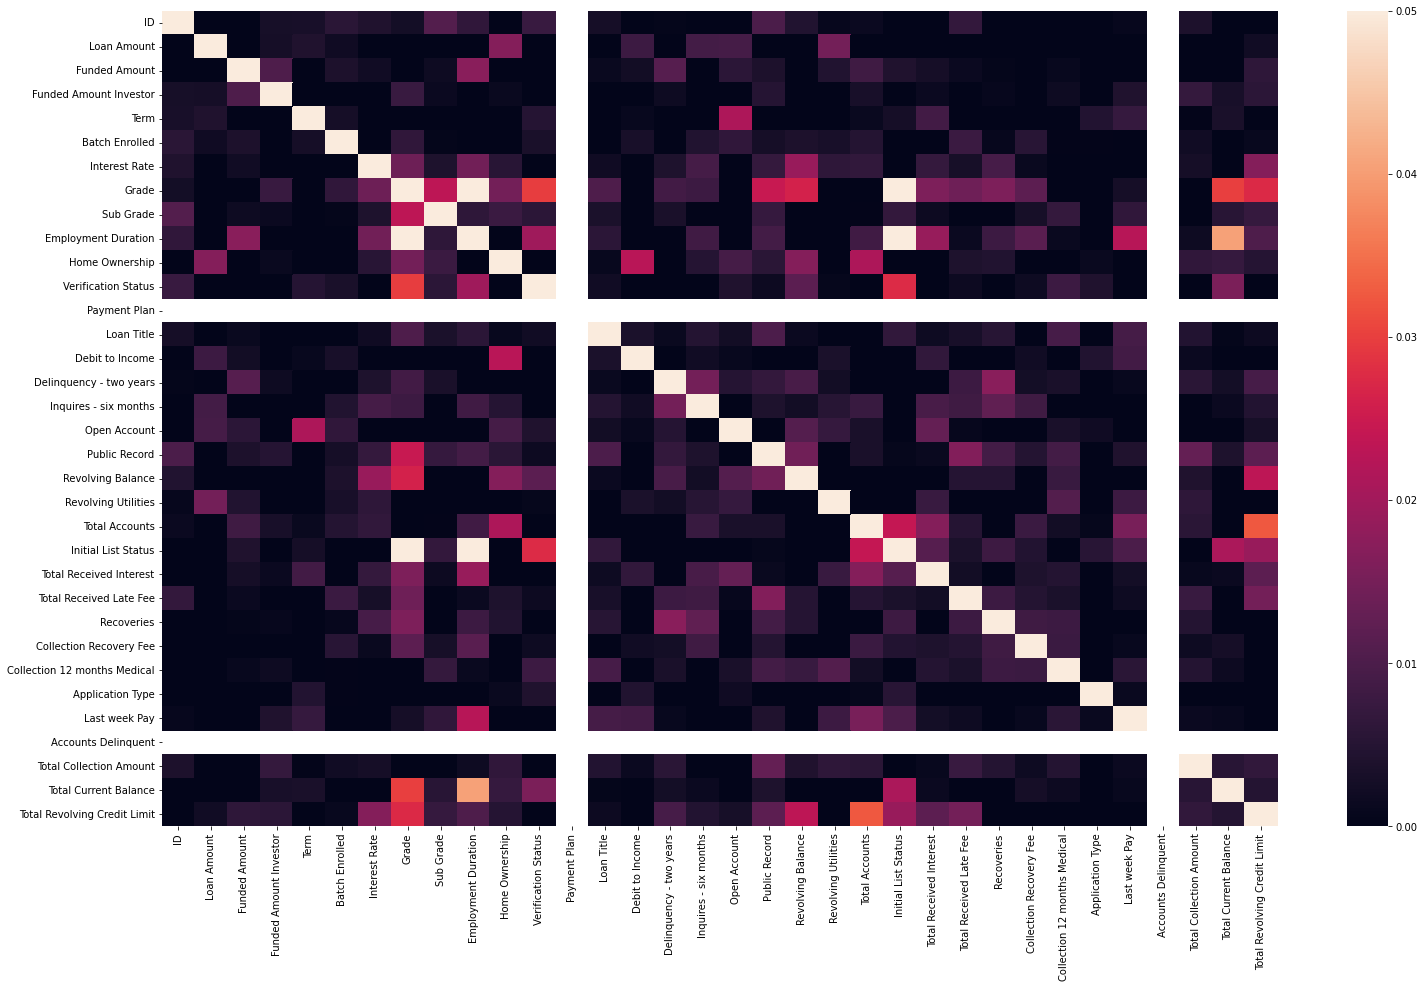

In [131]:
plt.figure(figsize=(25,15))
sns.heatmap(X_train.corr(), vmin=0.0, vmax=0.05)
plt.show()

 
    1 Funded Amount & Funded Amount Investor are correlated.
    2.Grade & Sub Grade/ Employment Duration are correlated.
    3.Total Accounts & Initial List Status are correlated.
    4.Grade, Term, Employment Duration and Total Revolving Credit Limit are some of the influential features

In [132]:
print(X_train.shape)

(67463, 34)


# Perform outlier removal (manual)

In [133]:
# feature set : Term , Funded Amount Investor, 
# Grade, Employment Duration, Verification Status, 
# Initial List Status, Total Revolving Credit Limit

# plt.figure(figsize=(4,4))
# plt.boxplot( x=X_train['Term'], showmeans=True, meanline=True )

# plt.figure(figsize=(4,4))
# plt.boxplot( x=X_train['Funded Amount Investor'], showmeans=True, meanline=True )

# percentile25 = X_train['Funded Amount Investor'].quantile(0.25)
# percentile75 = X_train['Funded Amount Investor'].quantile(0.75)
# iqr = percentile75 - percentile25


# upper_limit = percentile75 + 1.5 * iqr
# lower_limit = percentile25 - 1.5 * iqr


# y_train = y_train.drop( X_train[ (X_train['Funded Amount Investor']>upper_limit) | (X_train['Funded Amount Investor']<lower_limit) ].index )
# X_train = X_train.drop( X_train[ (X_train['Funded Amount Investor']>upper_limit) | (X_train['Funded Amount Investor']<lower_limit) ].index )

# print(X_train.shape)
# print(y_train.shape)
# plt.figure(figsize=(4,4))
# plt.boxplot( x=X_train['Funded Amount Investor'], showmeans=True, meanline=True )

# plt.figure(figsize=(4,4))
# plt.boxplot( x=X_train['Grade'], showmeans=True, meanline=True )

# plt.figure(figsize=(4,4))
# plt.boxplot( x=X_train['Employment Duration'], showmeans=True, meanline=True )

# plt.figure(figsize=(4,4))
# plt.boxplot( x=X_train['Verification Status'], showmeans=True, meanline=True )

# plt.figure(figsize=(4,4))
# plt.boxplot( x=X_train['Initial List Status'], showmeans=True, meanline=True )

# plt.figure(figsize=(4,4))
# plt.boxplot( x=X_train['Total Revolving Credit Limit'], showmeans=True, meanline=True )

# percentile25 = X_train['Total Revolving Credit Limit'].quantile(0.25)
# percentile75 = X_train['Total Revolving Credit Limit'].quantile(0.75)
# iqr = percentile75 - percentile25


# upper_limit = percentile75 + 1.5 * iqr
# lower_limit = percentile25 - 1.5 * iqr



# y_train = y_train.drop( X_train[ (X_train['Total Revolving Credit Limit']>upper_limit) | (X_train['Total Revolving Credit Limit']<lower_limit) ].index )
# X_train = X_train.drop( X_train[ (X_train['Total Revolving Credit Limit']>upper_limit) | (X_train['Total Revolving Credit Limit']<lower_limit) ].index )

# print(X_train.shape)
# print(y_train.shape)
# plt.figure(figsize=(4,4))
# plt.boxplot( x=X_train['Total Revolving Credit Limit'], showmeans=True, meanline=True )

Using Isolation Forest for outlier removal showed improved performance compared to manual outlier removal method.

In [134]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(X_train)

mask = yhat != -1

X_train = X_train[mask]
y_train = y_train[mask]

print(X_train.shape, y_train.shape)

(60716, 34) (60716,)


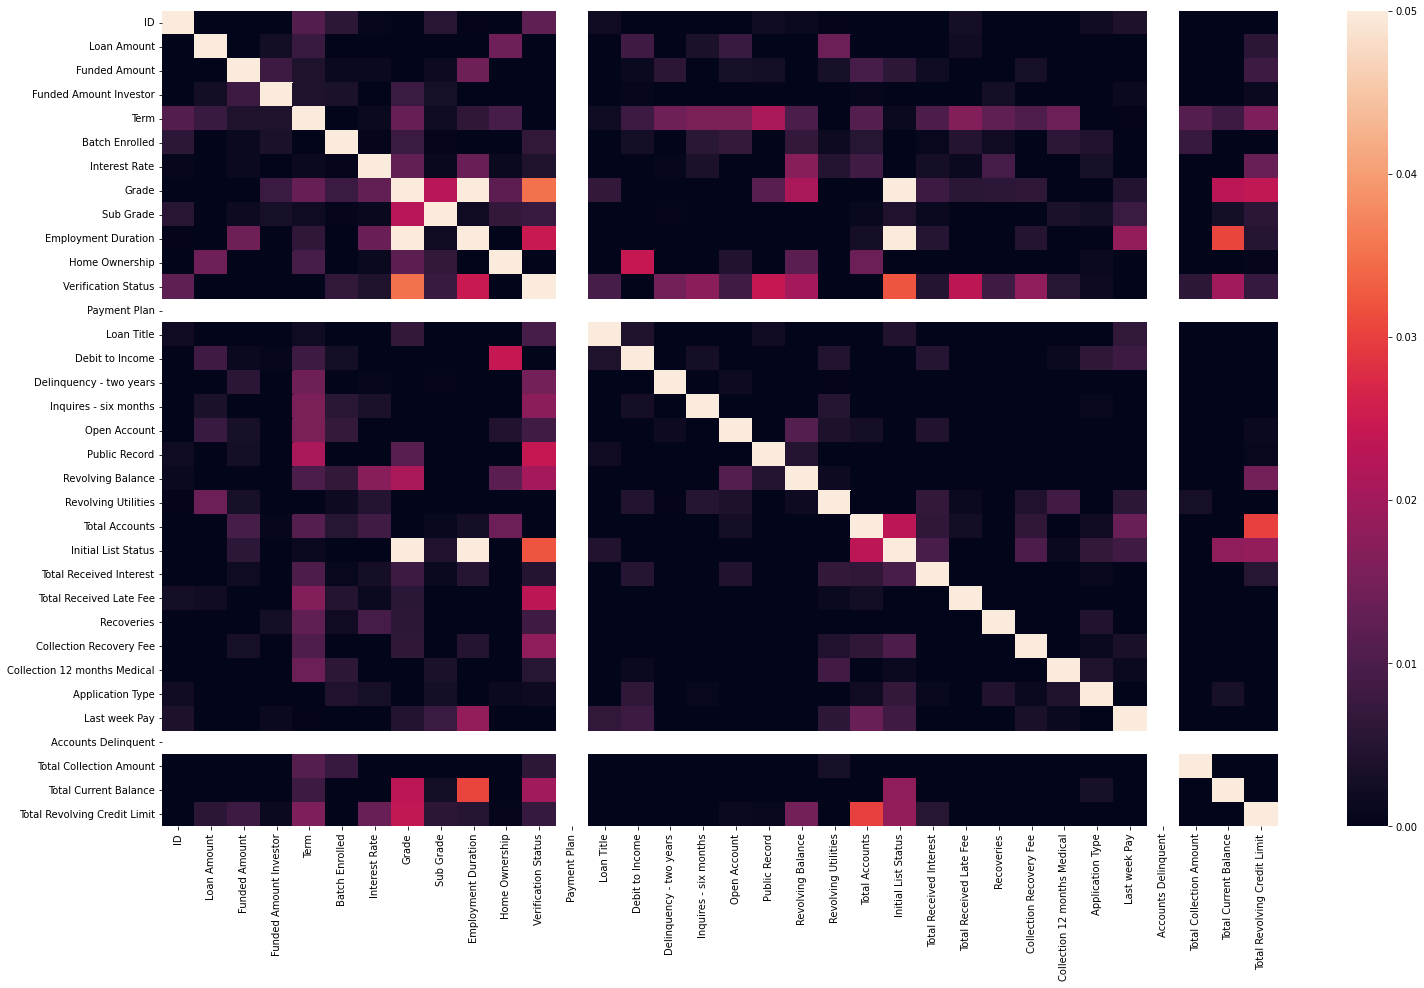

In [135]:
plt.figure(figsize=(25,15))
sns.heatmap(X_train.corr(), vmin=0.0, vmax=0.05)
plt.show()

Looking for traces of multi-collinearity

In [136]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

calc_vif(X_train)

,variables,VIF
0,ID,1.088062
1,Loan Amount,1.007403
2,Funded Amount,1.082119
3,Funded Amount Investor,1.044845
4,Term,1.040362
5,Batch Enrolled,1.000892
6,Interest Rate,1.012479
7,Grade,1.028278
8,Sub Grade,1.011900
9,Employment Duration,1.456384


None of the features have high VIF values

Now, lets look at Information Gain

I am using mutual_info_classif to realize information by each feature towards target variable

In [137]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2, mutual_info_classif

mutual_info = mutual_info_classif(X_train, y_train, random_state=777)

mutual_data=pd.Series(mutual_info,index=X_train.columns)
mutual_data.sort_values(ascending=False)

Collection Recovery Fee         0.002897
Verification Status             0.002660
Term                            0.001978
Funded Amount Investor          0.001544
Loan Amount                     0.001380
Total Accounts                  0.001127
Loan Title                      0.001099
Employment Duration             0.000943
Recoveries                      0.000794
Total Received Interest         0.000699
Batch Enrolled                  0.000676
Initial List Status             0.000643
Revolving Utilities             0.000641
Home Ownership                  0.000578
Revolving Balance               0.000536
Debit to Income                 0.000484
Total Collection Amount         0.000461
Delinquency - two years         0.000334
Accounts Delinquent             0.000293
Total Current Balance           0.000290
Application Type                0.000119
Grade                           0.000000
Funded Amount                   0.000000
Interest Rate                   0.000000
Total Revolving 

In [138]:
cols_to_drop = mutual_data.loc[mutual_data==0.00].index
list(cols_to_drop)

['ID',
 'Funded Amount',
 'Interest Rate',
 'Grade',
 'Sub Grade',
 'Payment Plan',
 'Inquires - six months',
 'Open Account',
 'Public Record',
 'Total Received Late Fee',
 'Collection 12 months Medical',
 'Last week Pay',
 'Total Revolving Credit Limit']

In [139]:
X_train = X_train.drop( columns=list(cols_to_drop) )

X_test = X_test.drop( columns=list(cols_to_drop) )

In [140]:
print(X_train.shape)
print(X_test.shape)

(60716, 21)
(28913, 21)


In [141]:
print('No Defaulters[0]', round(y_train.value_counts()[0]/len(y_train) * 100,2), '% of the dataset')
print('Defaulters[1]', round(y_train.value_counts()[1]/len(y_train) * 100,2), '% of the dataset')

No Defaulters[0] 90.86 % of the dataset
Defaulters[1] 9.14 % of the dataset


Using dimensionality reduction techniques to visualize class distribution ( without sampling)

In [142]:
# from sklearn.manifold import TSNE
# from sklearn.decomposition import PCA, TruncatedSVD
# import time

# # New_df is from the random undersample data (fewer instances)
# X = X_train
# y = y_train


# # T-SNE Implementation
# t0 = time.time()
# X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
# t1 = time.time()
# print("T-SNE took {:.2} s".format(t1 - t0))

# # PCA Implementation
# t0 = time.time()
# X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
# t1 = time.time()
# print("PCA took {:.2} s".format(t1 - t0))

# # TruncatedSVD
# t0 = time.time()
# X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
# t1 = time.time()
# print("Truncated SVD took {:.2} s".format(t1 - t0))

In [143]:
# import matplotlib.patches as mpatches

# f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# # labels = ['No Fraud', 'Fraud']
# f.suptitle('Clusters using Dimensionality Reduction to examine Loan Status Defaulters(No Sampling)', fontsize=14)


# green_patch = mpatches.Patch(color='#00FF00', label='Default')
# red_patch = mpatches.Patch(color='#ff0037', label='No Default')


# # t-SNE scatter plot
# ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap=plt.cm.prism, edgecolor='k', alpha=0.7, label='No Defaulter', linewidths=0.7)
# ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap=plt.cm.prism, edgecolor='k', alpha=0.7, label='Defaulter', linewidths=0.7)
# ax1.set_title('t-SNE', fontsize=14)

# ax1.grid(True)

# ax1.legend(handles=[green_patch, red_patch])


# # PCA scatter plot
# ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap=plt.cm.prism, edgecolor='k', alpha=0.7, label='No Defaulter', linewidths=0.7)
# ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap=plt.cm.prism, edgecolor='k', alpha=0.7, label='Defaulter', linewidths=0.7)
# ax2.set_title('PCA', fontsize=14)

# ax2.grid(True)

# ax2.legend(handles=[green_patch, red_patch])

# # TruncatedSVD scatter plot
# ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap=plt.cm.prism, edgecolor='k', alpha=0.7, label='No Defaulter', linewidths=0.7)
# ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap=plt.cm.prism, edgecolor='k', alpha=0.7, label='Defaulter', linewidths=0.7)
# ax3.set_title('Truncated SVD', fontsize=14)

# ax3.grid(True)

# ax3.legend(handles=[green_patch, red_patch])

# plt.show()

In [144]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.metrics import classification_report, confusion_matrix

Model Performance on unsampled dataset

In [145]:
# from sklearn.model_selection import StratifiedShuffleSplit
# from sklearn.model_selection import StratifiedKFold
# from sklearn.model_selection import train_test_split

# skf = StratifiedShuffleSplit(n_splits=5, random_state=None)

# for train_index, test_index in skf.split(X_train, y_train):
#     print("Train:", train_index, "Test:", test_index)
#     original_Xtrain, original_Xtest = X_train.iloc[train_index], X_train.iloc[test_index]
#     original_ytrain, original_ytest = y_train.iloc[train_index], y_train.iloc[test_index]
    
# # Turn into an array
# original_Xtrain = original_Xtrain.values
# original_Xtest = original_Xtest.values
# original_ytrain = original_ytrain.values
# original_ytest = original_ytest.values

# # See if both the train and test label distribution are similarly distributed
# train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
# test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
# print('-' * 100)

# print('Label Distributions: \n')
# print(train_counts_label/ len(original_ytrain))
# print(test_counts_label/ len(original_ytest))

In [146]:
# print(original_Xtrain.shape)
# print(original_Xtest.shape)
# print(original_ytrain.shape)
# print(original_ytest.shape)

In [147]:
y_train.value_counts()

0    55165
1     5551
Name: Loan Status, dtype: int64

In [148]:
# from sklearn.model_selection import cross_val_score

# model = LogisticRegression(random_state=0)
# model.fit(original_Xtrain, original_ytrain)
# scores = cross_val_score( model, original_Xtrain, original_ytrain, cv=5 )
# print( scores.mean() )

In [149]:
# from sklearn.model_selection import GridSearchCV

# log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# grid_log = GridSearchCV( LogisticRegression(), param_grid = log_reg_params )
# grid_log.fit(original_Xtrain, original_ytrain)

# log_tuned = grid_log.best_estimator_

# print(grid_log.best_params_)

# scores = cross_val_score( log_tuned, original_Xtrain , original_ytrain, cv=5 )
# print(scores.mean())

In [150]:
# model1 = LogisticRegression(  C=0.001, penalty='l2' )
# model1.fit(X_train, y_train)

# y_preds1 = model1.predict(X_test)
# print(confusion_matrix(y_test,y_preds1))
# print(accuracy_score(y_test,y_preds1))
# print(classification_report(y_test,y_preds1))

In [151]:
# pd.DataFrame(y_preds1).value_counts()

Clearly our dataset is imbalanced. I will create equally distributed correctly balanced dataset for our analysis and further processing using RandomUnderSampling and re=evaluate Performance

In [152]:
# df = pd.concat( [ X_train, y_train ], axis=1 )
# df = df.sample(frac=1)

# default = df.loc[df['Loan Status']==1]
# no_default = df.loc[df['Loan Status']==0][:6000]

# new_df = pd.concat( [default, no_default] ).sample(frac=1, random_state=42)

# new_df.head()

In [153]:
# new_df['Loan Status'].value_counts()

Evaluating performance (Undersampling)

In [154]:
# y_train2 = new_df['Loan Status']
# X_train2 = new_df.drop(columns=['Loan Status'])


# model = LogisticRegression(random_state=0)
# model.fit(X_train2, y_train2)
# scores = cross_val_score( model, X_train2, y_train2, cv=5 )
# print( scores.mean() )

In [155]:
# from sklearn.model_selection import GridSearchCV

# log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# grid_log = GridSearchCV( LogisticRegression(), param_grid = log_reg_params )
# grid_log.fit(X_train2, y_train2)

# log_tuned = grid_log.best_estimator_

# print(grid_log.best_params_)

# scores = cross_val_score( log_tuned, X_train2 , y_train2, cv=5 )
# print(scores.mean())

In [156]:
# model2 = LogisticRegression(  C=0.001, penalty='l2' )
# model2.fit(X_train2, y_train2)

# y_preds2 = model2.predict(X_test)
# print(confusion_matrix(y_test,y_preds2))
# print(accuracy_score(y_test,y_preds2))
# print(classification_report(y_test,y_preds2))

In [157]:
# pd.DataFrame(y_preds2).value_counts()

In [158]:
# from sklearn.manifold import TSNE
# from sklearn.decomposition import PCA, TruncatedSVD
# import time

# # New_df is from the random undersample data (fewer instances)
# X = X_train2
# y = y_train2


# # T-SNE Implementation
# t0 = time.time()
# X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
# t1 = time.time()
# print("T-SNE took {:.2} s".format(t1 - t0))

# # PCA Implementation
# t0 = time.time()
# X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
# t1 = time.time()
# print("PCA took {:.2} s".format(t1 - t0))

# # TruncatedSVD
# t0 = time.time()
# X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
# t1 = time.time()
# print("Truncated SVD took {:.2} s".format(t1 - t0))

In [159]:
# import matplotlib.patches as mpatches

# f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# # labels = ['No Fraud', 'Fraud']
# f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


# blue_patch = mpatches.Patch(color='#00FF00', label='No Default')
# red_patch = mpatches.Patch(color='#ff0037', label='Default')


# # t-SNE scatter plot
# ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap=plt.cm.prism, edgecolor='k', alpha=0.7, label='No Defaulter', linewidths=0.7)
# ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap=plt.cm.prism, edgecolor='k', alpha=0.7, label='Defaulter', linewidths=0.7)
# ax1.set_title('t-SNE', fontsize=14)

# ax1.grid(True)

# ax1.legend(handles=[blue_patch, red_patch])


# # PCA scatter plot
# ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap=plt.cm.prism, edgecolor='k', alpha=0.7, label='No Defaulter', linewidths=0.7)
# ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap=plt.cm.prism, edgecolor='k', alpha=0.7, label='Defaulter', linewidths=0.7)
# ax2.set_title('PCA', fontsize=14)

# ax2.grid(True)

# ax2.legend(handles=[blue_patch, red_patch])

# # TruncatedSVD scatter plot
# ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap=plt.cm.prism, edgecolor='k', alpha=0.7, label='No Defaulter', linewidths=0.7)
# ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap=plt.cm.prism, edgecolor='k', alpha=0.7, label='Defaulter', linewidths=0.7)
# ax3.set_title('Truncated SVD', fontsize=14)

# ax3.grid(True)

# ax3.legend(handles=[blue_patch, red_patch])

# plt.show()

Oversampling

In [160]:
# from imblearn.over_sampling import SMOTE


# print('Length of X (train): {} | Length of y (train): {}'.format(len(original_Xtrain), len(original_ytrain)))
# print('Length of X (test): {} | Length of y (test): {}'.format(len(original_Xtest), len(original_ytest)))

# os = SMOTE( sampling_strategy = 'minority' )

# X_train3, y_train3 = os.fit_resample(X_train, y_train)

# print(X_train3.shape)
# print(y_train3.shape)

# print(y_train3.value_counts())

In [161]:
# model3 = LogisticRegression(  C=0.001, penalty='l2' )
# model3.fit(X_train3, y_train3)

# y_preds3 = model3.predict(X_test)
# print(confusion_matrix(y_test,y_preds3))
# print(accuracy_score(y_test,y_preds3))
# print(classification_report(y_test,y_preds3))

In [162]:
# pd.DataFrame(y_preds3).value_counts()

In [163]:
# preds1 = pd.DataFrame(y_preds1, columns=['Loan Status'])
# preds1.value_counts()

In [164]:
# preds2 = pd.DataFrame(y_preds2, columns=['Loan Status'])
# preds2.value_counts()

In [165]:
# preds3 = pd.DataFrame(y_preds3, columns=['Loan Status'])
# preds3.value_counts()

In [166]:
# preds1.to_csv("predictions1.csv", index=False)

In [167]:
# preds2.to_csv("predictions2.csv", index=False)

In [168]:
# preds3.to_csv("predictions3.csv", index=False)

To improve classifier performance on imbalanced datset, I had implemented several sampling technioques

Random Undersampling worsened the performance since it took away informative samples from majority class

Oversampling techniques such as SMOTE seemed to do well. Improving on SMOTE Technique, I used SMOTETOmek and SMOTEENN to deal noisy samples around the decision boundary of our classifier model

In [169]:
from collections import Counter
Counter(y_train)

Counter({0: 55165, 1: 5551})

In [170]:
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours
from collections import Counter

#os=SMOTETomek(0.75)
os = SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='all'))

X_train_ns,y_train_ns=os.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 55165, 1: 5551})
The number of classes after fit Counter({1: 54819, 0: 25682})


Dimensionality Reduction on sampled dataset

In [171]:
# from sklearn.manifold import TSNE
# from sklearn.decomposition import PCA, TruncatedSVD
# import time

# # New_df is from the random undersample data (fewer instances)
# X = X_train_ns
# y = y_train_ns


# # T-SNE Implementation
# t0 = time.time()
# X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
# t1 = time.time()
# print("T-SNE took {:.2} s".format(t1 - t0))

# # PCA Implementation
# t0 = time.time()
# X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
# t1 = time.time()
# print("PCA took {:.2} s".format(t1 - t0))

# # TruncatedSVD
# t0 = time.time()
# X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
# t1 = time.time()
# print("Truncated SVD took {:.2} s".format(t1 - t0))

In [172]:
# import matplotlib.patches as mpatches

# f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# # labels = ['No Fraud', 'Fraud']
# f.suptitle('Clusters using Dimensionality Reduction to examine Loan Status Defaulters(with Sampling)', fontsize=14)


# green_patch = mpatches.Patch(color='#00FF00', label='Default')
# red_patch = mpatches.Patch(color='#ff0037', label='No Default')


# # t-SNE scatter plot
# ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap=plt.cm.prism, edgecolor='k', alpha=0.7, label='No Defaulter', linewidths=0.7)
# ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap=plt.cm.prism, edgecolor='k', alpha=0.7, label='Defaulter', linewidths=0.7)
# ax1.set_title('t-SNE', fontsize=14)

# ax1.grid(True)

# ax1.legend(handles=[green_patch, red_patch])


# # PCA scatter plot
# ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap=plt.cm.prism, edgecolor='k', alpha=0.7, label='No Defaulter', linewidths=0.7)
# ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap=plt.cm.prism, edgecolor='k', alpha=0.7, label='Defaulter', linewidths=0.7)
# ax2.set_title('PCA', fontsize=14)

# ax2.grid(True)

# ax2.legend(handles=[green_patch, red_patch])

# # TruncatedSVD scatter plot
# ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap=plt.cm.prism, edgecolor='k', alpha=0.7, label='No Defaulter', linewidths=0.7)
# ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap=plt.cm.prism, edgecolor='k', alpha=0.7, label='Defaulter', linewidths=0.7)
# ax3.set_title('Truncated SVD', fontsize=14)

# ax3.grid(True)

# ax3.legend(handles=[green_patch, red_patch])

# plt.show()

In [173]:
from sklearn.model_selection import train_test_split


train_X, test_X, train_y, test_y = train_test_split(X_train_ns, y_train_ns, test_size=0.2, random_state=777)

In [174]:
X_test.shape

(28913, 21)

In [175]:
print(train_X.shape)
print(test_X.shape)
print(train_y.shape)
print(test_y.shape)

print(train_y.value_counts())
print("-----------------------------")
print(test_y.value_counts())

(64400, 21)
(16101, 21)
(64400,)
(16101,)
1    43871
0    20529
Name: Loan Status, dtype: int64
-----------------------------
1    10948
0     5153
Name: Loan Status, dtype: int64


# Modelling

In [176]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# 1. Logistic Regression

In [177]:
lr = LogisticRegression(random_state=1234)
lr.fit(train_X,train_y)

y_pred = lr.predict(test_X)
print(confusion_matrix(test_y,y_pred))
print(accuracy_score(test_y,y_pred))
print(classification_report(test_y,y_pred))
print(f1_score(test_y, y_pred, average='macro'))

[[    2  5151]
 [    0 10948]]
0.68008198248556
              precision    recall  f1-score   support

           0       1.00      0.00      0.00      5153
           1       0.68      1.00      0.81     10948

    accuracy                           0.68     16101
   macro avg       0.84      0.50      0.41     16101
weighted avg       0.78      0.68      0.55     16101

0.40516484273505005


In [178]:
from sklearn.metrics import log_loss

log_loss(test_y, lr.predict(test_X))

11.049832677259044

# Naive Bayes

In [179]:
gaussiannb = GaussianNB()
gaussiannb.fit(train_X,train_y)

y_pred = gaussiannb.predict(test_X)
print(confusion_matrix(test_y,y_pred))
print(accuracy_score(test_y,y_pred))
print(classification_report(test_y,y_pred))
print(f1_score(test_y, y_pred, average='macro'))

[[  365  4788]
 [  402 10546]]
0.6776597726849264
              precision    recall  f1-score   support

           0       0.48      0.07      0.12      5153
           1       0.69      0.96      0.80     10948

    accuracy                           0.68     16101
   macro avg       0.58      0.52      0.46     16101
weighted avg       0.62      0.68      0.59     16101

0.46291862738242395


In [180]:
from sklearn.metrics import log_loss

log_loss(test_y, lr.predict(test_X))

11.049832677259044

# Ensemble Methods

In [181]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier=RandomForestClassifier(n_estimators=5, min_samples_split=20, min_samples_leaf=10, max_depth=10)
rf_classifier.fit(train_X,train_y)

y_pred4 = rf_classifier.predict(test_X)
print(confusion_matrix(test_y,y_pred4))
print(accuracy_score(test_y,y_pred4))
print(classification_report(test_y,y_pred4))
print(f1_score(test_y, y_pred4, average='macro'))

[[ 2110  3043]
 [  576 10372]]
0.7752313520899323
              precision    recall  f1-score   support

           0       0.79      0.41      0.54      5153
           1       0.77      0.95      0.85     10948

    accuracy                           0.78     16101
   macro avg       0.78      0.68      0.69     16101
weighted avg       0.78      0.78      0.75     16101

0.6948945232444617


In [182]:
from sklearn.metrics import log_loss

log_loss(test_y, rf_classifier.predict(test_X))

7.763385190246683

In [183]:
preds = rf_classifier.predict(X_test)
preds = pd.DataFrame(preds)

preds.value_counts()

1    19389
0     9524
dtype: int64

In [184]:
#preds.to_csv('sub_rf_final.csv')

In [185]:
from sklearn.ensemble import GradientBoostingClassifier

gb_classifier = GradientBoostingClassifier(n_estimators=50, min_samples_split=40, min_samples_leaf=20, max_depth=8).fit(train_X,train_y)
prediction = gb_classifier.predict(test_X)

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

print(confusion_matrix(test_y,prediction))
print(accuracy_score(test_y,prediction))
print(classification_report(test_y,prediction))
print(f1_score(test_y, prediction, average='macro'))

[[4578  575]
 [1076 9872]]
0.8974597851065151
              precision    recall  f1-score   support

           0       0.81      0.89      0.85      5153
           1       0.94      0.90      0.92     10948

    accuracy                           0.90     16101
   macro avg       0.88      0.90      0.89     16101
weighted avg       0.90      0.90      0.90     16101

0.8850305427919243


In [186]:
from sklearn.metrics import log_loss

log_loss(test_y, gb_classifier.predict(test_X))

3.5416421089696235

In [187]:
preds = gb_classifier.predict(X_test)
preds = pd.DataFrame(preds)

preds.value_counts()

0    19593
1     9320
dtype: int64

In [188]:
preds.to_csv('sub_gb_colab.csv')

In [189]:
#y_train_ns.value_counts()

## Neural Network

---



In [190]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Flatten,Dropout,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow import keras
from tensorflow.keras import layers

In [191]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

import keras
from keras.layers import Input
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [192]:
print(train_X.shape)
print(test_X.shape)
print(X_test.shape)

(64400, 21)
(16101, 21)
(28913, 21)


In [219]:
# Initialising the ANN
model = Sequential()
model.add(Dense(64, input_dim=21, activation='LeakyReLU'))
model.add(Dense(32, activation='LeakyReLU'))
#model.add(Dropout(0.2))
model.add(Dense(16, activation='LeakyReLU'))
#model.add(Dropout(0.2))
#model.add(Dense(16, activation='LeakyReLU'))
model.add(Dense(1, activation='sigmoid'))

from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss='binary_crossentropy', 
              metrics=['acc',f1_m,precision_m, recall_m])


# model.compile(loss="binary_crossentropy",
#               optimizer=,
#               metrics=["accuracy"])
print(model.summary())

model.fit(train_X, train_y,
          validation_data=(test_X, test_y),
          epochs=10,
          callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)], verbose=0)

# Evaluate our model
loss, acc, f1_score, precision, recall = model.evaluate(test_X, test_y, verbose=1)
print("Validation accuracy :", acc, f1_score, precision, recall)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 64)                1408      
                                                                 
 dense_45 (Dense)            (None, 32)                2080      
                                                                 
 dense_46 (Dense)            (None, 16)                528       
                                                                 
 dense_47 (Dense)            (None, 1)                 17        
                                                                 
Total params: 4,033
Trainable params: 4,033
Non-trainable params: 0
_________________________________________________________________
None
504/504 [==============================] - 2s 4ms/step - loss: 0.5439 - acc: 0.7378 - f1_m: 0.8203 - precision_m: 0.7607 - recall_m: 0.8980
Validation accuracy : 0.73778027296066

In [220]:
y_pred_nn = model.predict(X_test)

In [221]:
y_pred_nn

array([[0.362092  ],
       [0.8301089 ],
       [0.3253312 ],
       ...,
       [0.20383579],
       [0.12528712],
       [0.24840835]], dtype=float32)

In [222]:
y_pred_nn = (y_pred_nn > 0.5)
y_pred_nn = [int(val) for val in y_pred_nn]
#y_pred_nn

In [223]:
y_pred_nn = pd.DataFrame(y_pred_nn)
y_pred_nn.value_counts()

1    15455
0    13458
dtype: int64

In [224]:
y_pred_nn.to_csv('mysubmission.csv')

# GridSearchCV for Logistic Regression

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

penalty = ['l1','l2','elasticnet']
C = [0.00001,0.001,.009,0.01,.09,1,5,10,25,100]
solver = [ 'lbfgs','saga','liblinear' ]

param_grid = {
                'penalty' : penalty,
                'C' : C,
                'solver' : solver
             }

lrc = LogisticRegression()


lr_gridcv = GridSearchCV(estimator=lrc , param_grid=param_grid , 
                        scoring='f1_macro',cv=3,verbose=10,
                        n_jobs=-1)

lr_gridcv.fit(train_X,train_y)

Fitting 3 folds for each of 90 candidates, totalling 270 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1e-05, 0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25,
                               100],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'saga', 'liblinear']},
             scoring='f1_macro', verbose=10)

In [ ]:
print(lr_gridcv.best_params_)

{'C': 5, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
print(lr_gridcv.best_score_)

0.4126833889605713


In [ ]:
print(lr_gridcv.best_estimator_)

LogisticRegression(C=5, solver='liblinear')


In [ ]:
best_lr = lr_gridcv.best_estimator_

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = best_lr.predict(test_X)
print(confusion_matrix(test_y,y_pred))
print("Accuracy Score {}".format(accuracy_score(test_y,y_pred)))
print("Classification report: {}".format(classification_report(test_y,y_pred)))
print("f1 score {}".format(f1_score(test_y,y_pred, average='macro')))

[[   17  4966]
 [   23 10947]]
Accuracy Score 0.6872688522534947
Classification report:               precision    recall  f1-score   support

           0       0.42      0.00      0.01      4983
           1       0.69      1.00      0.81     10970

    accuracy                           0.69     15953
   macro avg       0.56      0.50      0.41     15953
weighted avg       0.61      0.69      0.56     15953

f1 score 0.4105934484653709


In [ ]:
from sklearn.metrics import log_loss

log_loss(test_y, best_lr.predict(test_X))

10.801600089954727

# GridSearchCV for RandomForest

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

n_estimators = [10,30,50,100,300, 400, 500, 600, 700,1000]
max_features = ['auto', 'sqrt','log2']
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 14]
min_samples_leaf = [1, 2, 4, 6, 8]

param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(param_grid)

rfc = RandomForestClassifier()


rf_gridcv = GridSearchCV(estimator=rfc , param_grid=param_grid , 
                        scoring='f1_macro',cv=3,verbose=10,
                        n_jobs=-1)

rf_gridcv.fit(train_X,train_y)

{'n_estimators': [10, 30, 50, 100, 300, 400, 500, 600, 700, 1000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [5, 8, 15, 25, 30], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}
Fitting 3 folds for each of 6000 candidates, totalling 18000 fits


In [ ]:
print(rf_gridcv.best_params_)

In [ ]:
print(rf_gridcv.best_score_)

In [ ]:
print(rf_gridcv.best_estimator_)

In [ ]:
best_rf = rf_gridcv.best_estimator_

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = best_rf.predict(test_X)
print(confusion_matrix(test_y,y_pred))
print("Accuracy Score {}".format(accuracy_score(test_y,y_pred)))
print("Classification report: {}".format(classification_report(test_y,y_pred)))
print("f1 score {}".format(f1_score(test_y,y_pred, average='macro')))

In [ ]:
from sklearn.metrics import log_loss

log_loss(test_y, best_rf.predict(test_X))

In [ ]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV


penalty = ['l1','l2','elasticnet']
C = [0.00001,0.001,.009,0.01,.09,1,5,10,25,100]
solver = [ 'lbfgs','saga','liblinear' ]

param_grid = {
                'penalty' : penalty,
                'C' : C,
                'solver' : solver
             }

lr_clf = LogisticRegression()

lr_randomcv = RandomizedSearchCV(estimator=lr_clf,param_distributions=param_grid, scoring='neg_log_loss', n_iter=5,cv=2,verbose=2,
                               random_state=100,n_jobs=-1)

lr_randomcv.fit(train_X,train_y)

Fitting 2 folds for each of 5 candidates, totalling 10 fits


RandomizedSearchCV(cv=2, estimator=LogisticRegression(), n_iter=5, n_jobs=-1,
                   param_distributions={'C': [0.001, 0.009, 0.01, 0.09, 1, 5,
                                              10, 25, 100, 300, 1000, 10000],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['lbfgs', 'saga',
                                                   'liblinear']},
                   random_state=100, scoring='neg_log_loss', verbose=2)

In [ ]:
lr_randomcv.best_params_

{'solver': 'liblinear', 'penalty': 'l2', 'C': 25}

In [ ]:
lr_randomcv

RandomizedSearchCV(cv=2, estimator=LogisticRegression(), n_iter=5, n_jobs=-1,
                   param_distributions={'C': [0.001, 0.009, 0.01, 0.09, 1, 5,
                                              10, 25, 100, 300, 1000, 10000],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['lbfgs', 'saga',
                                                   'liblinear']},
                   random_state=100, scoring='neg_log_loss', verbose=2)

In [ ]:
best_random_grid=lr_randomcv.best_estimator_

In [ ]:
from sklearn.metrics import accuracy_score

y_pred=best_random_grid.predict(test_X)
print(confusion_matrix(test_y,y_pred))
print("Accuracy Score {}".format(accuracy_score(test_y,y_pred)))
print("Classification report: {}".format(classification_report(test_y,y_pred)))
print("f1 score {}".format(f1_score(test_y,y_pred, average='macro')))

[[   18  4965]
 [   23 10947]]
Accuracy Score 0.6873315363881402
Classification report:               precision    recall  f1-score   support

           0       0.44      0.00      0.01      4983
           1       0.69      1.00      0.81     10970

    accuracy                           0.69     15953
   macro avg       0.56      0.50      0.41     15953
weighted avg       0.61      0.69      0.56     15953

f1 score 0.41080696741645606


In [ ]:
from sklearn.metrics import log_loss

log_loss(test_y, best_random_grid.predict(test_X))

10.799435006522625

In [ ]:
preds = best_random_grid.predict(X_test)

In [ ]:
fin = pd.DataFrame(preds)

fin.value_counts()

1    28166
0      747
dtype: int64

# RandomSearchCV for RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier=RandomForestClassifier(n_estimators=10).fit(train_X,train_y)
prediction=rf_classifier.predict(test_X)

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

print(confusion_matrix(test_y,prediction))
print(accuracy_score(test_y,prediction))
print(classification_report(test_y,prediction))
print("f1 score {}".format(f1_score(test_y,prediction, average='macro')))

[[ 4628   355]
 [  807 10163]]
0.9271610355419043
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      4983
           1       0.97      0.93      0.95     10970

    accuracy                           0.93     15953
   macro avg       0.91      0.93      0.92     15953
weighted avg       0.93      0.93      0.93     15953

f1 score 0.9171927914299196


In [ ]:
from sklearn.metrics import log_loss

log_loss(test_y, rf_classifier.predict(test_X))

2.5157864995909196

In [ ]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [300, 400, 500, 600, 700,1000]
max_features = ['auto', 'sqrt','log2']
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 14]
min_samples_leaf = [1, 2, 4, 6, 8]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [300, 400, 500, 600, 700, 1000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [5, 8, 15, 25, 30], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [ ]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=5,cv=2,verbose=2,
                               random_state=100,n_jobs=-1)

rf_randomcv.fit(train_X,train_y)

Fitting 2 folds for each of 5 candidates, totalling 10 fits


RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [5, 8, 15, 25, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [300, 400, 500, 600,
                                                         700, 1000]},
                   random_state=100, verbose=2)

In [ ]:
rf_randomcv.best_params_

{'n_estimators': 500,
 'min_samples_split': 5,
 'min_samples_leaf': 8,
 'max_features': 'auto',
 'max_depth': 30,
 'criterion': 'entropy'}

In [ ]:
rf_randomcv

RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [5, 8, 15, 25, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [300, 400, 500, 600,
                                                         700, 1000]},
                   random_state=100, verbose=2)

In [ ]:
best_random_grid=rf_randomcv.best_estimator_

In [ ]:
from sklearn.metrics import accuracy_score

y_pred=best_random_grid.predict(test_X)

print(confusion_matrix(test_y,y_pred))
print("Accuracy Score {}".format(accuracy_score(test_y,y_pred)))
print("Classification report: {}".format(classification_report(test_y,y_pred)))
print("f1 score {}".format(f1_score(test_y,y_pred, average='macro')))

[[ 4718   265]
 [  792 10178]]
Accuracy Score 0.9337428696796841
Classification report:               precision    recall  f1-score   support

           0       0.86      0.95      0.90      4983
           1       0.97      0.93      0.95     10970

    accuracy                           0.93     15953
   macro avg       0.92      0.94      0.92     15953
weighted avg       0.94      0.93      0.93     15953

f1 score 0.9249518203374552


In [ ]:
from sklearn.metrics import log_loss

log_loss(test_y, best_random_grid.predict(test_X))

2.2884534910511882

In [ ]:
preds = best_random_grid.predict(X_test)

In [ ]:
fin2 = pd.DataFrame(preds)

fin2.value_counts()

0    17906
1    11007
dtype: int64

# RandomSearchCV for GradientBoost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_classifier = GradientBoostingClassifier(n_estimators=50, min_samples_split=40, min_samples_leaf=20, max_depth=8).fit(train_X,train_y)
prediction = gb_classifier.predict(test_X)

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

print(confusion_matrix(test_y,prediction))
print(accuracy_score(test_y,prediction))
print(classification_report(test_y,prediction))

[[4589  445]
 [1105 9880]]
0.9032399026156439
              precision    recall  f1-score   support

           0       0.81      0.91      0.86      5034
           1       0.96      0.90      0.93     10985

    accuracy                           0.90     16019
   macro avg       0.88      0.91      0.89     16019
weighted avg       0.91      0.90      0.90     16019



In [ ]:
from sklearn.metrics import log_loss

log_loss(test_y, gb_classifier.predict(test_X))

3.341997579934328

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [300, 400, 500, 600, 700,1000]
max_features = ['auto', 'sqrt','log2']
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 14]
min_samples_leaf = [1, 2, 4, 6, 8]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
                'loss':['deviance','exponential'],
                'learning_rate' : [0.1,0.01,0.001]}
print(random_grid)

In [ ]:
gb=GradientBoostingClassifier()
gb_randomcv=RandomizedSearchCV(estimator=gb,param_distributions=random_grid,n_iter=5,cv=2,verbose=2,
                               random_state=100,n_jobs=-1)

gb_randomcv.fit(train_X,train_y)

In [ ]:
gb_randomcv.best_params_

In [ ]:
gb_randomcv

In [ ]:
best_random_grid=gb_randomcv.best_estimator_

In [ ]:
from sklearn.metrics import accuracy_score

y_pred=best_random_grid.predict(test_X)

print(confusion_matrix(test_y,y_pred))
print("Accuracy Score {}".format(accuracy_score(test_y,y_pred)))
print("Classification report: {}".format(classification_report(test_y,y_pred)))
print("f1 score {}".format(f1_score(test_y,y_pred, average='macro')))

In [ ]:
from sklearn.metrics import log_loss

log_loss(test_y, best_random_grid.predict(test_X))

In [ ]:
preds = gb_classifier.predict(X_test)
preds =  pd.DataFrame(preds)
preds.value_counts()

0    18322
1    10591
dtype: int64

In [ ]:
fin3 = pd.DataFrame(preds)

fin3.value_counts()

# RandomSearchCV for XGBoost

In [ ]:
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier(n_estimators=10).fit(train_X,train_y)
prediction = xgb_classifier.predict(test_X)

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

print(confusion_matrix(test_y,prediction))
print(accuracy_score(test_y,prediction))
print(classification_report(test_y,prediction))

[01:26:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[4346  637]
 [1328 9642]]
0.8768256754215508
              precision    recall  f1-score   support

           0       0.77      0.87      0.82      4983
           1       0.94      0.88      0.91     10970

    accuracy                           0.88     15953
   macro avg       0.85      0.88      0.86     15953
weighted avg       0.88      0.88      0.88     15953



In [ ]:
from sklearn.metrics import log_loss

log_loss(test_y, xgb_classifier.predict(test_X))

4.254322381969694

In [ ]:
preds = xgb_classifier.predict(X_test)

preds = pd.DataFrame(preds)
preds.to_csv('sub_xgb_final.csv')

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [300, 400, 500, 600, 700,1000]
# Number of features to consider at every split
#max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [5, 8, 15, 25, 30]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6, 8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
                'loss':['deviance','exponential'],
                'learning_rate' : [0.1,0.01,0.001],
                'min_child_weight': [1, 5, 10],
                'gamma': [0.5, 1, 1.5, 2, 5],
                'subsample': [0.6, 0.8, 1.0],
                'colsample_bytree': [0.6, 0.8, 1.0]}
print(random_grid)

In [ ]:
xgb=XGBClassifier()
xgb_randomcv=RandomizedSearchCV(estimator=xgb,param_distributions=random_grid,n_iter=5,cv=2,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
xgb_randomcv.fit(train_X,train_y)

In [ ]:
xgb_randomcv.best_params_

In [ ]:
xgb_randomcv

In [ ]:
best_random_grid=xgb_randomcv.best_estimator_

In [ ]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(test_X)
print(confusion_matrix(test_y,y_pred))
print("Accuracy Score {}".format(accuracy_score(test_y,y_pred)))
print("Classification report: {}".format(classification_report(test_y,y_pred)))
print("f1 score {}".format(f1_score(test_y,y_pred, average='macro')))

In [ ]:
fin5 = pd.DataFrame(y_pred)

fin5.value_counts()

# RandomsearchCV for AdaBoost using DTC as base estimator

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

agb_classifier = AdaBoostClassifier(n_estimators=300).fit(train_X,train_y)
prediction = agb_classifier.predict(test_X)

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

print(confusion_matrix(test_y,prediction))
print(accuracy_score(test_y,prediction))
print(classification_report(test_y,prediction))

[[4684  299]
 [1326 9644]]
0.898138281201028
              precision    recall  f1-score   support

           0       0.78      0.94      0.85      4983
           1       0.97      0.88      0.92     10970

    accuracy                           0.90     15953
   macro avg       0.87      0.91      0.89     15953
weighted avg       0.91      0.90      0.90     15953



In [ ]:
from sklearn.metrics import log_loss

log_loss(test_y, agb_classifier.predict(test_X))

3.5181941152987832

In [ ]:
# from sklearn.tree import DecisionTreeClassifier

# dt_classifier = DecisionTreeClassifier(class_weight={0:100.0,1:10.0}).fit(X_train_ns,y_train_ns)
# prediction = dt_classifier.predict(X_test)

# from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

# print(confusion_matrix(y_test,prediction))
# print(accuracy_score(y_test,prediction))
# print(classification_report(y_test,prediction))

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 14]
min_samples_leaf = [1, 2, 4, 6, 8]

random_grid = {'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'criterion':criterion}
print(random_grid)

In [ ]:
dtc=DecisionTreeClassifier(class_weight={0:2.3,1:1.0})
dtc_randomcv=RandomizedSearchCV(estimator=dtc,param_distributions=random_grid,n_iter=5,cv=2,verbose=2,
                               random_state=100,n_jobs=-1)

dtc_randomcv.fit(train_X,train_y)

In [ ]:
dtc_randomcv.best_params_

In [ ]:
from sklearn.ensemble import AdaBoostClassifier


random_grid = {
    'n_estimators':[300,400,500,700,1000]
}

base = DecisionTreeClassifier( max_depth=30, criterion='gini', min_samples_split=2 ,min_samples_leaf=6 )

ada_clf = AdaBoostClassifier( base_estimator=base )

ada_randomcv = RandomizedSearchCV(estimator=ada_clf,param_distributions=random_grid,n_iter=5,cv=2,verbose=2,
                               random_state=100,n_jobs=-1)

ada_randomcv.fit(train_X,train_y)


In [ ]:
ada_randomcv

In [ ]:
best_random_grid=ada_randomcv.best_estimator_

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = best_random_grid.predict(test_X)

print(confusion_matrix(test_y,y_pred))
print("Accuracy Score {}".format(accuracy_score(test_y,y_pred)))
print("Classification report: {}".format(classification_report(test_y,y_pred)))

In [ ]:
from sklearn.metrics import log_loss

log_loss(test_y, best_random_grid.predict(test_X))

In [ ]:
fin4 = pd.DataFrame(y_pred)

fin4.value_counts()

In [ ]:
fin2.to_csv('preds_rf_final.csv')
fin3.to_csv('preds_gb_final.csv')
fin4.to_csv('preds_ada_final.csv')

In [ ]:
fin5.to_csv('preds_xgb_final.csv')

# achieved high performance on gradient boosting classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_classifier = GradientBoostingClassifier(n_estimators=10).fit(X_train_ns,y_train_ns)
prediction = gb_classifier.predict(X_test)

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [300, 400, 500, 600, 700,1000]
max_features = ['auto', 'sqrt','log2']
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 14]
min_samples_leaf = [1, 2, 4, 6, 8]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
                'loss':['deviance','exponential'],
                'learning_rate' : [0.1,0.01,0.001]}
print(random_grid)

In [ ]:
gb=GradientBoostingClassifier()
gb_randomcv=RandomizedSearchCV(estimator=gb,param_distributions=random_grid,n_iter=10,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)

gb_randomcv.fit(X_train_ns,y_train_ns)

In [ ]:
gb_randomcv.best_params_

In [ ]:
gb_randomcv

In [ ]:
best_random_grid=gb_randomcv.best_estimator_

In [ ]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

In [ ]:
final = pd.DataFrame(y_pred)

final.value_counts()

In [ ]:
final.to_csv('preds_gb_final2.csv')

In [ ]:
fin2.to_csv('preds_rf_smoteenn_2.csv')

In [ ]:
fin3.to_csv('preds_gb.csv')

In [ ]:
fin4.to_csv('preds_xgb.csv')

In [ ]:
fin6 = pd.DataFrame(y_pred)

fin6.value_counts()

In [ ]:
fin6.to_csv('preds_ada_cv.csv')

In [ ]:
fin5 = pd.DataFrame(prediction)
fin5.to_csv('preds_abclf.csv')

In [ ]:
fin.to_csv('my_predictions2.csv')